# Task 3: Forecast Future Market Trends
Let's start by forecasting Tesla's stock prices using the trained model.

# Step 1: Forecasting with SARIMA

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-11\data\raw\TSLA.csv', parse_dates=['Date'], index_col='Date')

# Display basic information about the data
print(df.head())


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]   # 80% for training
test = df.iloc[train_size:]    # 20% for testing

print(f"Training set: {len(train)} observations")
print(f"Testing set: {len(test)} observations")


Training set: 1979 observations
Testing set: 495 observations


c:\Users\MMM\Documents\10 Academy File\KAIM-Week-11\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMM\Documents\10 Academy File\KAIM-Week-11\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMM\Documents\10 Academy File\KAIM-Week-11\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\MMM\Documents\10 Academy File\KAIM-Week-11\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is availa

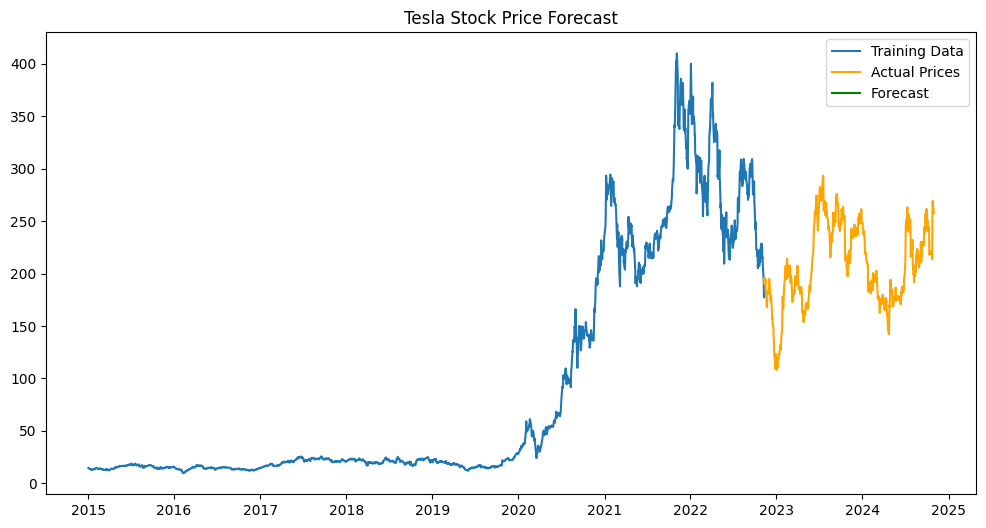

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Train the SARIMA model
sarima_model = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = sarima_model.fit(disp=False)

# Forecast for the next 180 days
n_forecast = len(test)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_series = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a DataFrame for future dates
forecast_df = pd.DataFrame({
    'Forecast': forecast_series,
    'Lower CI': confidence_intervals.iloc[:, 0],
    'Upper CI': confidence_intervals.iloc[:, 1]
}, index=test.index)

# Plot the forecast vs actual values
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Prices', color='orange')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.3)
plt.title("Tesla Stock Price Forecast")
plt.legend()
plt.show()


In [12]:
print("Test Indices:", test.index)
print("Forecast Indices:", forecast_df.index)


Test Indices: DatetimeIndex(['2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23',
               ...
               '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28',
               '2024-10-29', '2024-10-30'],
              dtype='datetime64[ns]', name='Date', length=495, freq=None)
Forecast Indices: DatetimeIndex(['2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23',
               ...
               '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28',
               '2024-10-29', '2024-10-30'],
              dtype='datetime64[ns]', name='Date', length=495, freq=None)
